# Stock prediction :regression models

uploading needed packages for data manipulation:

In [62]:
import pandas as pd
import datetime
from pandas import Series, DataFrame
import math
import numpy as np

Read,prepare and visualize data

In [95]:
data=pd.read_csv('AAPL.csv')

In [96]:
data.shape

(1007, 7)

In [97]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [86]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-09-08,111.750000,112.559998,110.320000,112.309998,104.817017,54843600
1,2015-09-09,113.760002,114.019997,109.769997,110.150002,102.801125,85010800
2,2015-09-10,110.269997,113.279999,109.900002,112.570000,105.059677,62892800
3,2015-09-11,111.790001,114.209999,111.760002,114.209999,106.590263,49915500
4,2015-09-14,116.580002,116.889999,114.860001,115.309998,107.616867,58363400


In [87]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1002,2019-08-30,210.160004,210.449997,207.199997,208.740005,208.740005,21143400
1003,2019-09-03,206.429993,206.979996,204.220001,205.699997,205.699997,20023000
1004,2019-09-04,208.389999,209.479996,207.320007,209.190002,209.190002,19188100
1005,2019-09-05,212.000000,213.970001,211.509995,213.279999,213.279999,23913700
1006,2019-09-06,214.050003,214.419998,212.509995,213.259995,213.259995,19350800


we will work on a historical data of four years

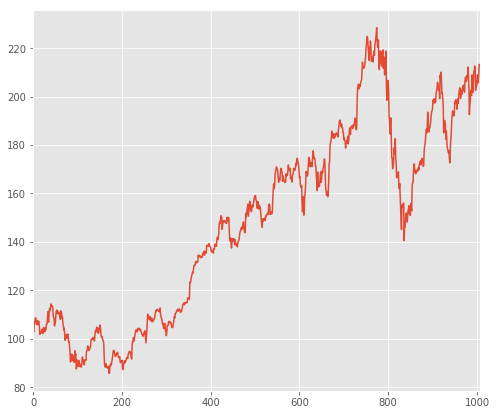

In [98]:
data["Adj Close"].plot()

Moving average to see the trend

In [99]:
close_px = data['Adj Close']
mavg = close_px.rolling(window=50).mean()

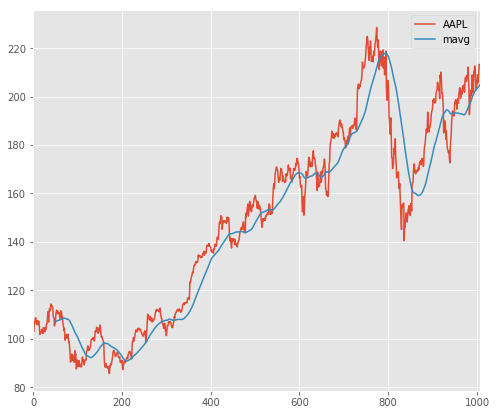

In [100]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

Uploading packages to train models

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
import sklearn.preprocessing 


Data Processing:

In [102]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True) ##Puting date as an index

In [103]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-09-08,111.750000,112.559998,110.320000,112.309998,104.817017,54843600
2015-09-09,113.760002,114.019997,109.769997,110.150002,102.801125,85010800
2015-09-10,110.269997,113.279999,109.900002,112.570000,105.059677,62892800
2015-09-11,111.790001,114.209999,111.760002,114.209999,106.590263,49915500
2015-09-14,116.580002,116.889999,114.860001,115.309998,107.616867,58363400


In [28]:
#Creating lags
lags_size=30 #1 month
shape_samples=len(data)-lags_size
index=np.arange(shape_samples).astype(np.int)[:,None]+np.arange(lags_size+1).astype(np.int)
database = data['Adj Close'].values[index] 
x = database[:,:-1]  
y = database[:,-1] 

Splitting data to train and test data 

In [32]:
index=0.75
index_split=int(index*num_samples)

In [36]:
x_train = x[:index_split]
y_train = y[:index_split]
x_test = x[index_split:]
y_test = y[index_split:]

In [37]:
x_train.shape

(731, 30)

Modeling Step:

First model:Lineair regression

In [39]:
model_lr=LinearRegression()
model_lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

model evaluation:

In [47]:
model_lr.score(x_test, y_test)

0.9651845558519548

The linear regression confidence is 0.96

In [48]:
y_pred_lr=model_lr.predict(x_test)

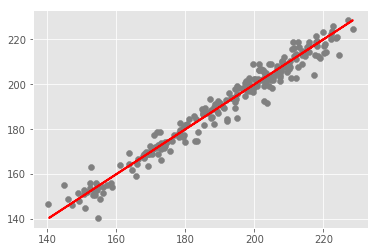

In [50]:
plt.scatter(y_pred_lr, y_test, color="gray")
plt.plot(y_test, y_test, color='red', linewidth=2)

Second model:Ridge Regression

In [52]:
model_ridge = Ridge()
model_ridge.fit(x_train, y_train)

#generate predictions
y_pred_ridge=model_ridge.predict(x_test)

In [53]:
model_ridge.score(x_test, y_test)

0.9651911774546112

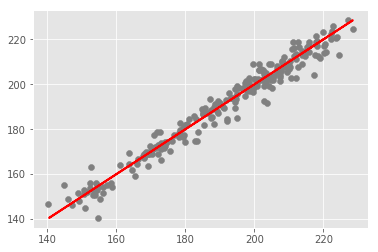

In [54]:
y_pred_ridge=model_ridge.predict(x_test)
plt.scatter(y_pred_ridge, y_test, color="gray")
plt.plot(y_test, y_test, color='red', linewidth=2)


Third model:Gradient Boosting Trees

In [58]:
model_gb = GradientBoostingRegressor()
model_gb.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [61]:
model_gb.score(x_test, y_test)

0.9119741740989055

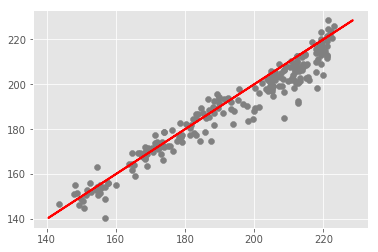

In [60]:
y_pred_gb = model_gb.predict(x_test)
plt.scatter(y_pred_gb, y_test, color="gray")
plt.plot(y_test, y_test, color='red', linewidth=2)

# Comparaison: Regression models (Lineair and ridge regression) are the most reliable ones to be used in this case to predict stock prices